In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/singhrau0/Big-Data-Preprocessing/main/titanic_dataset.csv")

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.drop("Cabin",axis=1,inplace=True)

In [ ]:
mean=df["Age"].mean()

In [ ]:
df["Age"].fillna(mean,inplace=True)

In [ ]:
mode=df["Embarked"].mode()
mode

0    S
Name: Embarked, dtype: object

In [ ]:
df["Embarked"].fillna(mode[0],inplace=True)

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df["Gender"].replace({"male":1,"female":0},inplace=True)

In [ ]:
x=df[["Age","Fare"]]
y=df["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [ ]:
x_train

,Age,Fare
453,49.000000,89.1042
588,22.000000,8.0500
27,19.000000,263.0000
758,34.000000,8.0500
865,42.000000,13.0000
...,...,...
740,29.699118,30.0000
399,28.000000,12.6500
828,29.699118,7.7500
562,28.000000,13.5000


In [ ]:
x_test

,Age,Fare
524,29.699118,7.2292
539,22.000000,49.5000
335,29.699118,7.8958
633,29.699118,0.0000
803,0.420000,8.5167
...,...,...
510,29.000000,7.7500
250,29.699118,7.2500
715,19.000000,7.6500
37,21.000000,8.0500


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgr=LogisticRegression()

In [ ]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_test

,Age,Fare
524,29.699118,7.2292
539,22.000000,49.5000
335,29.699118,7.8958
633,29.699118,0.0000
803,0.420000,8.5167
...,...,...
510,29.000000,7.7500
250,29.699118,7.2500
715,19.000000,7.6500
37,21.000000,8.0500


In [ ]:
x_test.loc[[421]]

,Age,Fare
421,21.0,7.7333


In [ ]:
y_test.loc[[421]]

421    0
Name: Survived, dtype: int64

In [ ]:
lgr.predict(x_test.loc[[421]])

array([0])

In [ ]:
lgr.score(x_test,y_test)

0.6591928251121076

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mx=MinMaxScaler()

In [ ]:
x[["Age","Fare"]]=mx.fit_transform(x)

<ipython-input-91-e8f46e77ca6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[["Age","Fare"]]=mx.fit_transform(x)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2529)

In [ ]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
lgr.score(x_test,y_test)

0.6681614349775785

In [ ]:
import seaborn as sns

<Axes: >

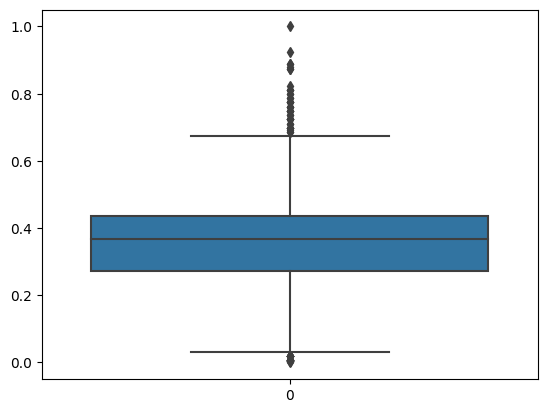

In [ ]:
sns.boxplot(x["Age"])

<Axes: >

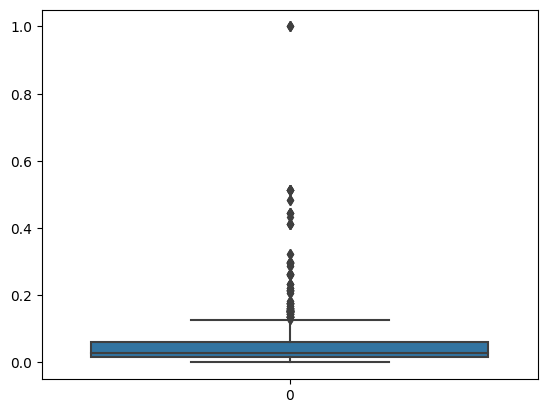

In [ ]:
sns.boxplot(x["Fare"])

<Axes: >

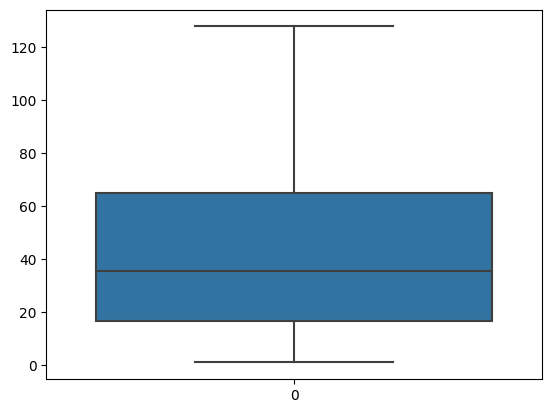

In [ ]:
sns.boxplot(x["Fare"]**(-1))

In [ ]:
x["Fare"]=x["Fare"]**(-1)

<ipython-input-99-08223d025fba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Fare"]=x["Fare"]**(-1)


In [ ]:
x

,Age,Fare
0,0.271174,70.666097
1,0.472229,7.187226
2,0.321438,64.647218
3,0.434531,9.648384
4,0.434531,63.643379
...,...,...
886,0.334004,39.409938
887,0.233476,17.077640
888,0.367921,21.847727
889,0.321438,17.077640


In [ ]:
import numpy as np

In [ ]:
x["Fare"].mean()

inf

In [ ]:
inf=np.inf

In [ ]:
x[x["Fare"]==inf]

,Age,Fare
179,0.447097,inf
263,0.497361,inf
271,0.308872,inf
277,0.367921,inf
302,0.233476,inf
413,0.367921,inf
466,0.367921,inf
481,0.367921,inf
597,0.610455,inf
633,0.367921,inf


In [ ]:
x[~(x["Fare"]==inf)]["Fare"].mean()

37.44629803932263

In [ ]:
x["Fare"].replace({inf:37.44},inplace=True)

<ipython-input-113-6a5bdbffeee5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Fare"].replace({inf:37.44},inplace=True)


In [ ]:
x["Fare"].mean()

37.4461920117246